In [13]:
import requests, pandas, numpy, matplotlib.pyplot
from bs4 import BeautifulSoup

In [14]:
page = requests.get("https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf")

In [15]:
page.status_code

200

In [16]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml"><head>
<meta content="IE=9" http-equiv="X-UA-Compatible"/><link href="/ocr/javax.faces.resource/theme.css.jsf?ln=primefaces-aristo" rel="stylesheet" type="text/css"/><link href="/ocr/javax.faces.resource/primefaces.css.jsf;jsessionid=DDF6534AA353D576719728F5D0452742?ln=primefaces" rel="stylesheet" type="text/css"/><script src="/ocr/javax.faces.resource/jquery/jquery.js.jsf;jsessionid=DDF6534AA353D576719728F5D0452742?ln=primefaces" type="text/javascript"></script><script src="/ocr/javax.faces.resource/primefaces.js.jsf;jsessionid=DDF6534AA353D576719728F5D0452742?ln=primefaces" type="text/javascript"></script><script src="/ocr/javax.faces.resource/jquery/jquery-plugins.js.jsf;jsessionid=DDF6534AA353D576719728F5D0452742?ln=primefaces" type="text/javascript"></script>
<meta content="text/html; charset=utf-8" http-equiv="Conten

In [17]:
soup.find_all(role="gridcell")
gridCells = soup.find_all(role="gridcell")
gridCells

[<td colspan="4" role="gridcell">As required by section 13402(e)(4) of the HITECH Act, the Secretary must post a list of breaches of unsecured protected health information affecting 500 or more individuals. The following breaches have been reported to the Secretary:
 				<br/><br/><span style="font-size: 1.5em; font-weight: bold">Cases Currently Under Investigation</span></td>,
 <td colspan="4" role="gridcell">This page lists all breaches reported within the last 24 months that are currently under investigation by the Office for Civil Rights.</td>,
 <td colspan="4" role="gridcell"> 
 				<a class="ui-commandlink ui-widget " href="#" id="ocrForm:j_idt42" onclick="PrimeFaces.ab({source:'ocrForm:j_idt42',process:'ocrForm:j_idt42',update:'ocrForm:underInvestigationAdvancedOptionsTable ocrForm:j_idt42',partialSubmit:true});return false;">Show Advanced Options</a></td>,
 <td role="gridcell" style="width:16px"><div class="ui-row-toggler ui-icon ui-icon-circle-triangle-e"></div></td>,
 <td rol

In [18]:
nameCoveredEntityList = []
stateList = []
coveredEntityTypeList = []
affectIndividualsList = []
breachSubmittedDateList = []
typeOfBreachList = []
locationOfBreachedInformationList = []
singleBreachList = []

In [19]:
skipTheBoringStuffCounter = 0

In [20]:
theGoodStuffCounter = 0

In [21]:
for c in gridCells:
    if skipTheBoringStuffCounter <=4:
        skipTheBoringStuffCounter=skipTheBoringStuffCounter+1
    if skipTheBoringStuffCounter >4:
        c = c.get_text().strip()
    if c!='':
        singleBreachList.append(c)
        theGoodStuffCounter=theGoodStuffCounter+1
    if theGoodStuffCounter == 8:
        nameCoveredEntityList.append(singleBreachList[0])
        stateList.append(singleBreachList[1])
        coveredEntityTypeList.append(singleBreachList[2])
        affectIndividualsList.append(singleBreachList[3])
        breachSubmittedDateList.append(singleBreachList[4])
        typeOfBreachList.append(singleBreachList[5])
        locationOfBreachedInformationList.append(singleBreachList[6])
        theGoodStuffCounter =0
        singleBreachList = []

In [22]:
breachDF = pandas.DataFrame({
"Company Name":nameCoveredEntityList,
"State":stateList,
"Company Type":coveredEntityTypeList,
"Affected Individuals":affectIndividualsList,
"Breach Date":breachSubmittedDateList,
"Breach Type":typeOfBreachList,
"Data location":locationOfBreachedInformationList
})
breachDF

,Affected Individuals,Breach Date,Breach Type,Company Name,Company Type,Data location,State
0,"<td role=""gridcell"" style=""width:16px""><div cl...","Partners HealthCare System, Inc.",MA,"<td colspan=""4"" role=""gridcell"">As required by...","<td colspan=""4"" role=""gridcell""> <a class...",Healthcare Provider,"<td colspan=""4"" role=""gridcell"">This page list..."
1,No,CarePlus Health Plan [case #HU1800066],KY,02/05/2018,Desktop Computer,Health Plan,Hacking/IT Incident
2,No,City of Detroit,MI,02/05/2018,Paper/Films,Healthcare Provider,Unauthorized Access/Disclosure
3,No,Ron's Pharmacy Services,CA,02/05/2018,Other Portable Electronic Device,Healthcare Provider,Loss
4,No,Eastern Maine Medical Center,ME,02/02/2018,Email,Healthcare Provider,Hacking/IT Incident
5,No,"Triple-S Advantage, Inc.",Health Plan,02/02/2018,Other Portable Electronic Device,36305,Theft
6,"Coastal Cape Fear Eye Associates, P.A.",NC,Healthcare Provider,Unauthorized Access/Disclosure,No,925,Paper/Films
7,Forrest General Hospital,MS,Healthcare Provider,Hacking/IT Incident,No,1670,"Desktop Computer, Network Server"
8,QuadMed,WI,Healthcare Provider,Hacking/IT Incident,No,4549,Email
9,"Steven Yang, D.D.S., INC.",CA,Healthcare Provider,Unauthorized Access/Disclosure,No,3202,Electronic Medical Record


In [26]:
breachDF.groupby('Breach Date').size()

Breach Date
AL                                         1
AZ                                         1
CA                                        11
CO                                         4
CT                                         1
CarePlus Health Plan [case #HU1800066]     1
City of Detroit                            1
Eastern Maine Medical Center               1
FL                                         6
GA                                         1
IA                                         1
IL                                         4
IN                                         2
KS                                         1
KY                                         5
MA                                         5
MD                                         1
MI                                         4
MN                                         2
MO                                         1
MS                                         1
NC                                         

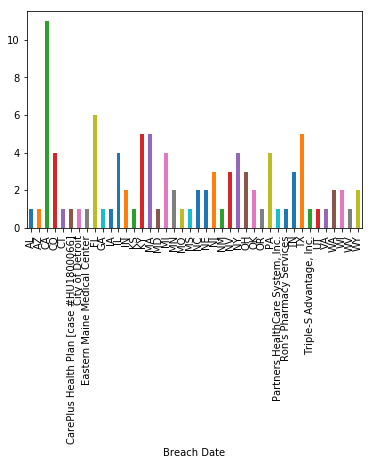

In [24]:
%matplotlib inline
breachDist = breachDF.groupby('Breach Date').size()
breachDist.plot(kind='bar')